In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Importing the CSV files for data Cleaning

In [0]:
df = pd.read_csv("credit.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df.isna().sum()
df = df.iloc[1:]
df = df.astype(float)
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
X = df.iloc[:,:23]
y = df.iloc[:,23:24]
X=(X-X.min())/(X.max()-X.min())
#pd.isnull(df).sum()

Tried Combining Features which are correlated

Splitting the Data ox features and the Labels then using the train_test_split to split into training and test set with 75% of the data in training set and 25% in test set

In [231]:
print(X.describe())
print(X.shape)
print(y.shape)
X_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.15, random_state=42)



                 X1            X2  ...           X22           X23
count  26429.000000  26429.000000  ...  26429.000000  26429.000000
mean       0.265635      0.610314  ...      0.059197      0.052016
std        0.219214      0.487688  ...      0.103929      0.099146
min        0.000000      0.000000  ...      0.000000      0.000000
25%        0.074074      0.000000  ...      0.003291      0.000000
50%        0.222222      1.000000  ...      0.026228      0.020759
75%        0.388889      1.000000  ...      0.067814      0.056897
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 23 columns]
(26429, 23)
(26429, 1)


In [0]:
#print(x_train_heat.head(5))
corrmat = df.corr()
#print(corrmat)
top_corr_features = corrmat.index

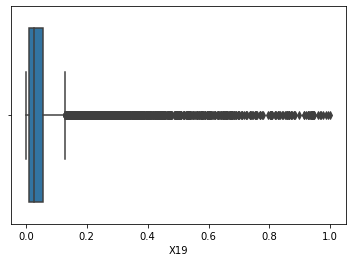

In [233]:
sns.boxplot(x=X['X19'])

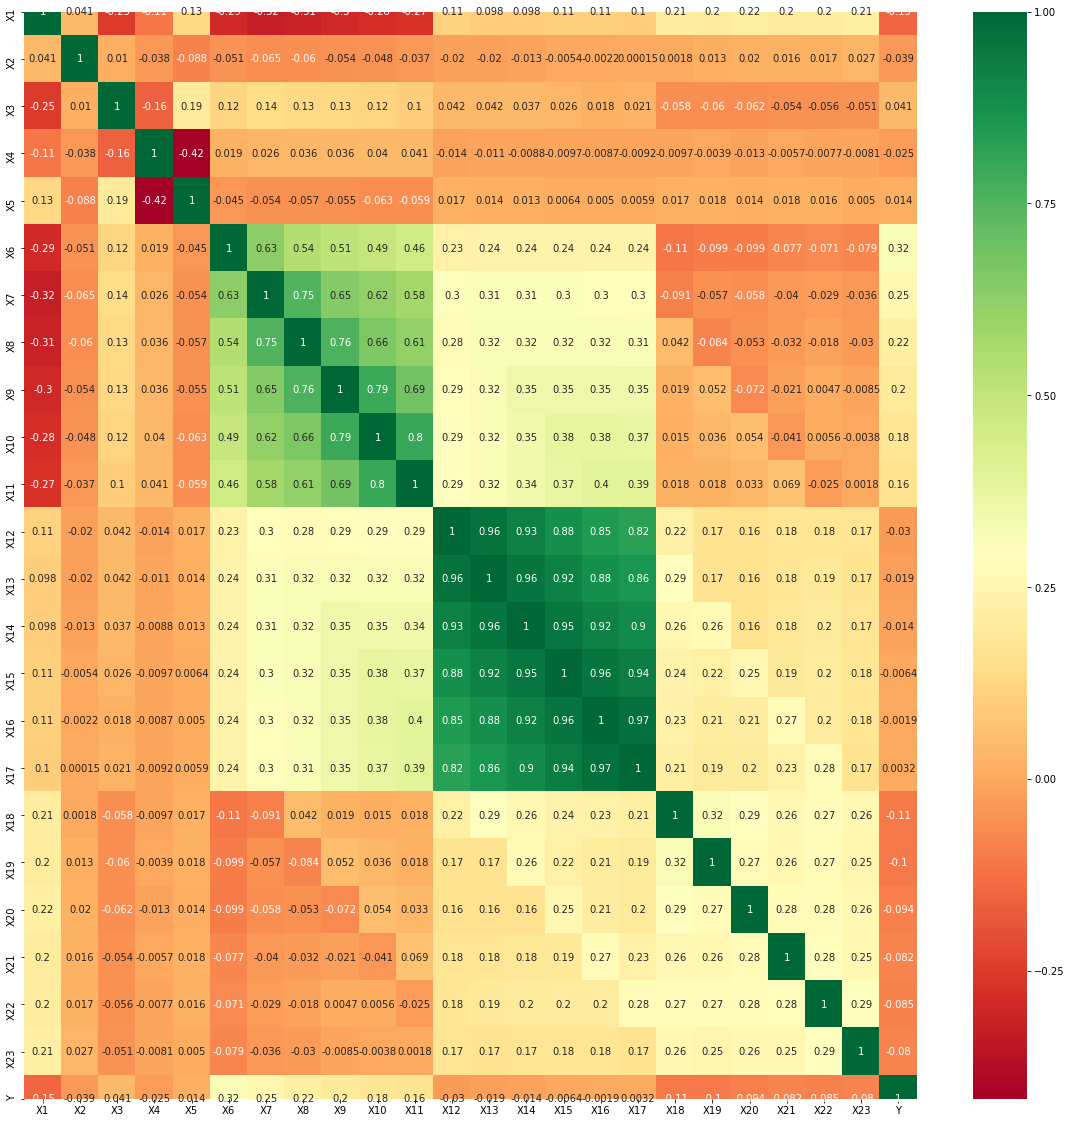

In [234]:
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [236]:
print(X_train.shape)
nn = KNeighborsClassifier(n_neighbors=10,weights='distance')
knn.fit(X_train, y_train.values.ravel())

(22464, 23)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [237]:
knn.score(x_test, y_test)

0.8100882723833543

Prediction Of the scores

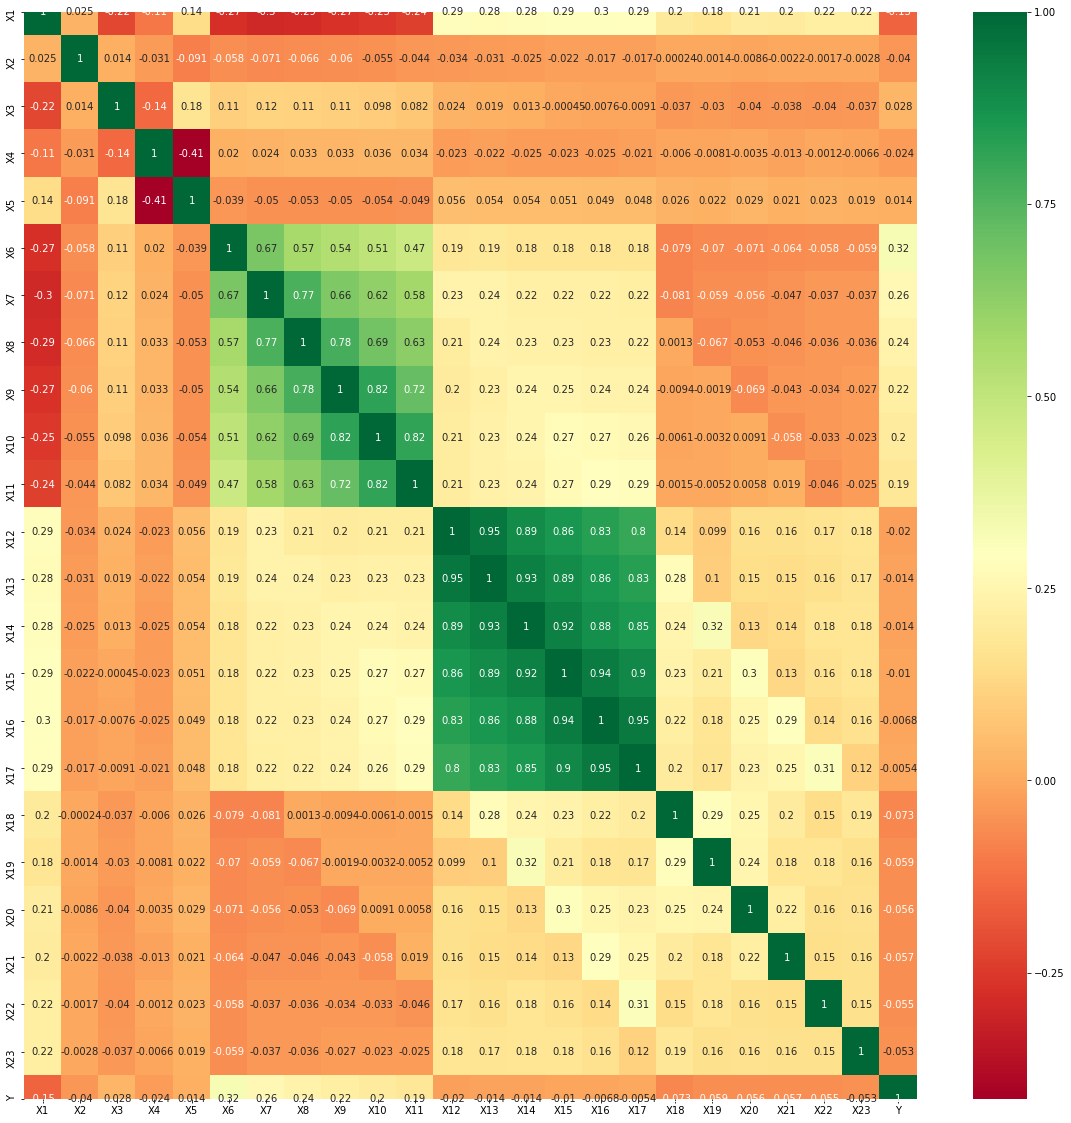